# Minority Opportunity Districts chain results for GA

This notebook reads in the results saved from the `minority_opportunity_chain.py`
script and plots histograms of the results.

In [2]:
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from gerrychain import Graph

## Load enacted plans

In [3]:
def update_enacted_df(cd_df):
    new_cols = ['CPOP', 'VAP', 'BVAP', 'nBVAP', 'CVAP', 'BCVAP', 'nBCVAP']

    VAP_cols = ['MVAPTOT', 'FVAPTOT']
    BVAP_cols = ['MVAPBLK', 'FVAPBLK']
    CVAP_cols = ['MNVVAPTOT', 'MNLVAPTOT', 'FNVVAPTOT', 'FNLVAPTOT']
    BCVAP_cols = ['MNVVAPBLK', 'MNLVAPBLK', 'FNVVAPBLK', 'FNLVAPBLK']
    BCPOP_cols = ['MNVVAPBLK', 'MNLVAPBLK', 'FNVVAPBLK', 'FNLVAPBLK', 'MNVU18BLK', 'MNLU18BLK', 'FNVU18BLK', 'FNLU18BLK']
    HCPOP_cols = ['MNVVAPHISP', 'MNLVAPHISP', 'FNVVAPHISP', 'FNLVAPHISP', 
                  'MNVU18HISP', 'MNLU18HISP', 'FNVU18HISP', 'FNLU18HISP']
    HVAP_cols = ['MVAPHISP', 'FVAPHISP']
    HCVAP_cols = ['MNVVAPHISP', 'MNLVAPHISP', 'FNVVAPHISP', 'FNLVAPHISP']
    
    cd_df['CPOP'] = pd.to_numeric(cd_df['TOTPOP']-cd_df['NCPOP'])
    cd_df['VAP'] = pd.to_numeric(cd_df[VAP_cols].sum(axis=1))
    cd_df['BCPOP'] = pd.to_numeric(cd_df[BCPOP_cols].sum(axis=1))
    cd_df['nBCPOP'] = cd_df['CPOP'] - cd_df['BCPOP']
    cd_df['BVAP'] = pd.to_numeric(cd_df[BVAP_cols].sum(axis=1))
    cd_df['nBVAP'] = cd_df['VAP'] - cd_df['BVAP']
    cd_df['CVAP'] = pd.to_numeric(cd_df[CVAP_cols].sum(axis=1))
    cd_df['BCVAP'] = pd.to_numeric(cd_df[BCVAP_cols].sum(axis=1))
    cd_df['nBCVAP'] = cd_df['CVAP'] - cd_df['BCVAP']
    cd_df['BHCPOP'] = pd.to_numeric(cd_df['BCPOP'] + cd_df[HCPOP_cols].sum(axis=1))
    cd_df['nBHCPOP'] = cd_df['CPOP'] - cd_df['BHCPOP']
    cd_df['BHVAP'] = pd.to_numeric(cd_df['BVAP'] + cd_df[HVAP_cols].sum(axis=1))
    cd_df['nBHVAP'] = cd_df['VAP'] - cd_df['BHVAP']
    cd_df['BHCVAP'] = pd.to_numeric(cd_df['BCVAP'] + cd_df[HCVAP_cols].sum(axis=1))
    cd_df['nBHCVAP'] = cd_df['CVAP'] - cd_df['BHCVAP']
    
    return cd_df

In [4]:
cong_df = update_enacted_df(gpd.read_file("../data/ga_2013_CD.shp"))
cong_df_2012 = update_enacted_df(gpd.read_file("../data/ga_2012_CD.shp"))

## Congressional Results

In [5]:
TOTPOP_congress_2010 = pickle.load(open("../data/minority_opportunity_runs/TOTPOP_congress_2010_min_opp_chain_results.p", "rb"))
TOTPOP_congress = pickle.load(open("../data/minority_opportunity_runs/TOTPOP_congress_min_opp_chain_results.p", "rb"))

In [6]:
CVAP_congress_2010 = pickle.load(open("../data/minority_opportunity_runs/CVAP_congress_2010_min_opp_chain_results.p", "rb"))
CVAP_congress = pickle.load(open("../data/minority_opportunity_runs/CVAP_congress_min_opp_chain_results.p", "rb"))

In [7]:
VAP_congress_2010 = pickle.load(open("../data/minority_opportunity_runs/VAP_congress_2010_min_opp_chain_results.p", "rb"))
VAP_congress = pickle.load(open("../data/minority_opportunity_runs/VAP_congress_min_opp_chain_results.p", "rb"))

In [8]:
CPOP_congress_2010 = pickle.load(open("../data/minority_opportunity_runs/CPOP_congress_2010_min_opp_chain_results.p", "rb"))
CPOP_congress = pickle.load(open("../data/minority_opportunity_runs/CPOP_congress_min_opp_chain_results.p", "rb"))

## Re-format into long form

In [9]:
congress_results_2010 = pd.DataFrame([])

redistricted_by = [("TOTPOP", TOTPOP_congress_2010),
                   ("CVAP", CVAP_congress_2010)]

for pop_col, pop_col_data in redistricted_by:
    for min_pop in ["BPOP", "BVAP", "BCPOP", "BCVAP"]:
        results = np.zeros((130000, 2))
        for i, sample in enumerate(pop_col_data[min_pop]):
            ls = list(zip(range(1, 14), sample))
            for j, l in enumerate(ls):
                results[i*13+j] = l

        df = pd.DataFrame(results, columns=["District", min_pop+"%"])
        df["redistricted_by"] = pop_col
        congress_results_2010 = congress_results_2010.append(df, sort=False)

In [10]:
congress_results = pd.DataFrame([])

redistricted_by = [("TOTPOP", TOTPOP_congress),("VAP", VAP_congress),
                   ("CPOP", CPOP_congress), ("CVAP", CVAP_congress)]

for pop_col, pop_col_data in redistricted_by:

    for min_pop in ["BPOP", "BVAP", "BCPOP", "BCVAP"]:
        results = np.zeros((140000, 2))
        for i, sample in enumerate(pop_col_data[min_pop]):
            ls = list(zip(range(1, 15), sample))
            for j, l in enumerate(ls):
                results[i*14+j] = l

        df = pd.DataFrame(results, columns=["District", min_pop+"%"])
        df["redistricted_by"] = pop_col
        congress_results = congress_results.append(df, sort=False)

In [16]:
congress_results.head()

,District,BPOP%,redistricted_by,BVAP%,BCPOP%,BCVAP%
0,1.0,0.062515,TOTPOP,NaN,NaN,NaN
1,2.0,0.091640,TOTPOP,NaN,NaN,NaN
2,3.0,0.116505,TOTPOP,NaN,NaN,NaN
3,4.0,0.192910,TOTPOP,NaN,NaN,NaN
4,5.0,0.210530,TOTPOP,NaN,NaN,NaN


## Plot Results

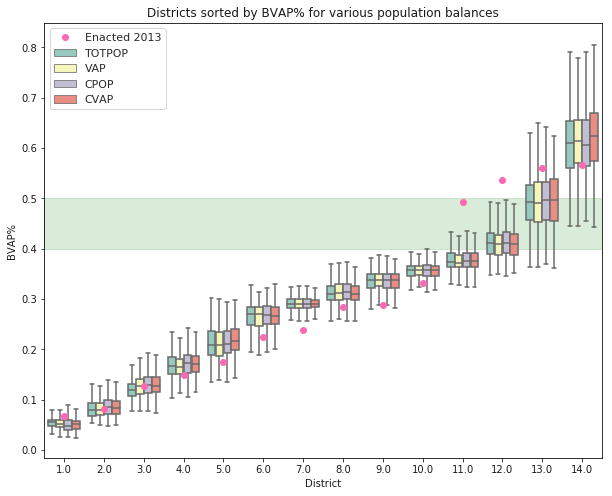

In [13]:
plt.figure(figsize=(10,8))
plt.title("Districts sorted by BVAP% for various population balances")
plt.xlabel("Sorted Districts")
plt.ylabel("BVAP%")
sns.set(style="whitegrid")

sns.boxplot(data=congress_results, x="District", y="BVAP%",
            hue="redistricted_by", 
            fliersize=0, palette="Set3")


plt.plot(sorted(cong_df['BVAP']/cong_df['VAP']),
         marker="o", linestyle="None",
         label="Enacted 2013", color="hotpink", zorder=10)

plt.legend()
plt.axhspan(0.40, 0.50, alpha=0.15, color='green', zorder=0)
plt.show()
# plt.savefig("../plots/minority_opportunity_results_GA_congress_BVAP.png")

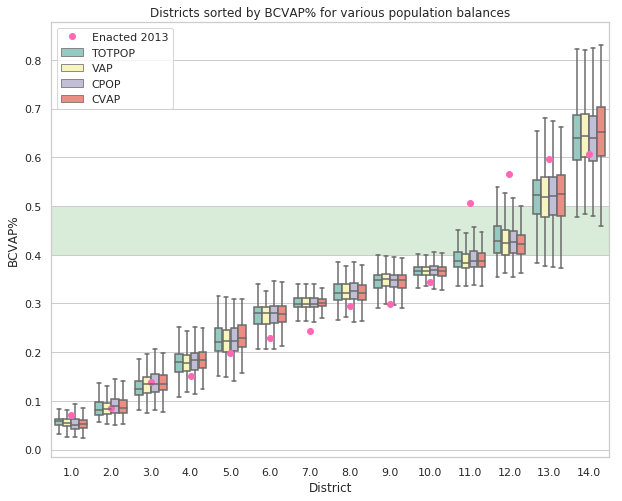

In [14]:
plt.figure(figsize=(10,8))
plt.title("Districts sorted by BCVAP% for various population balances")
plt.xlabel("Sorted Districts")
plt.ylabel("BCVAP%")
sns.set(style="whitegrid", palette="pastel")

sns.boxplot(data=congress_results, x="District", y="BCVAP%",
            hue="redistricted_by", fliersize=0, palette="Set3")

plt.plot(sorted(cong_df['BCVAP']/cong_df['CVAP']),
         marker="o", linestyle="None",
         label="Enacted 2013", color="hotpink")

plt.axhspan(0.40, 0.50, alpha=0.15, color='green', zorder=0)
plt.legend()
plt.show()
# plt.savefig("../plots/minority_opportunity_results_GA_congress_BCVAP.png")

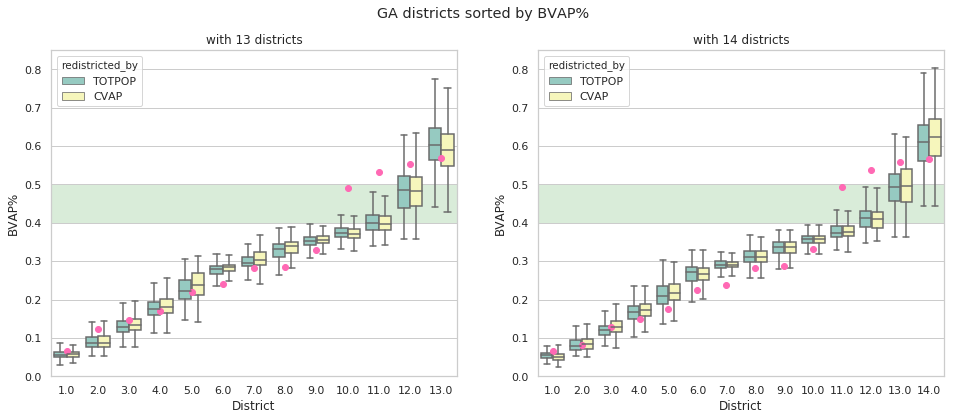

In [18]:
sns.set(style="whitegrid")
fig, axs = plt.subplots(1,2,figsize=(16,6))
plt.suptitle("GA districts sorted by BVAP%")

axs[0].set_title("with 13 districts")
axs[0].set_xlabel("Sorted Districts")
axs[0].set_ylabel("BVAP%")
axs[0].set_ylim(0,0.85)

sns.boxplot(data=congress_results_2010, x="District", y="BVAP%",
            hue="redistricted_by", fliersize=0, palette="Set3", ax=axs[0])

axs[0].plot(sorted(cong_df_2012['BVAP']/cong_df_2012['VAP']),
         marker="o", linestyle="None",
         label="Enacted 2013", color="hotpink")

axs[0].axhspan(0.40, 0.50, alpha=0.15, color='green', zorder=0)

axs[1].set_title("with 14 districts")
axs[1].set_xlabel("Sorted Districts")
axs[1].set_ylabel("BVAP%")
axs[1].set_ylim(0,0.85)

sns.boxplot(data=congress_results, x="District", y="BVAP%",
            hue="redistricted_by", fliersize=0, palette="Set3", 
            ax=axs[1], hue_order=["TOTPOP", "CVAP"])

axs[1].plot(sorted(cong_df['BVAP']/cong_df['VAP']),
         marker="o", linestyle="None",
         label="Enacted 2013", color="hotpink")

axs[1].axhspan(0.40, 0.50, alpha=0.15, color='green', zorder=0)

plt.show()
# plt.savefig("../plots/minority_opportunity_results_GA_BVAP_comp.png")

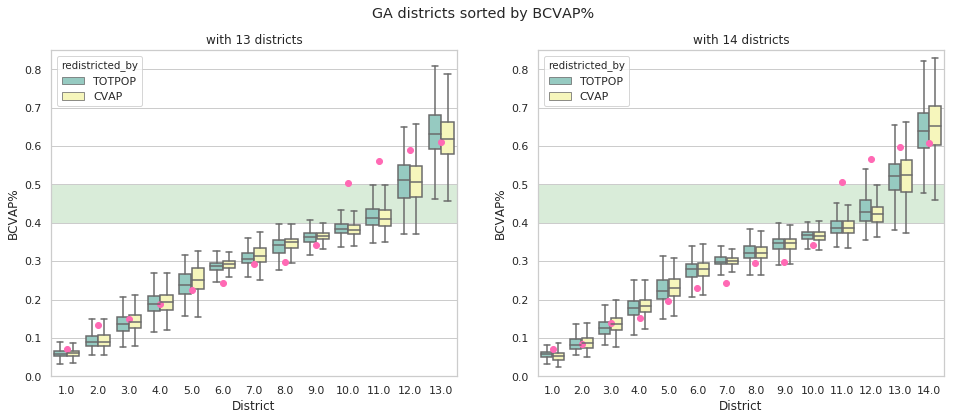

In [15]:
sns.set(style="whitegrid")
fig, axs = plt.subplots(1,2,figsize=(16,6))
plt.suptitle("GA districts sorted by BCVAP%")

axs[0].set_title("with 13 districts")
axs[0].set_xlabel("Sorted Districts")
axs[0].set_ylabel("BCVAP%")
axs[0].set_ylim(0,0.85)

sns.boxplot(data=congress_results_2010, x="District", y="BCVAP%",
            hue="redistricted_by", fliersize=0, palette="Set3", ax=axs[0])

axs[0].plot(sorted(cong_df_2012['BCVAP']/cong_df_2012['CVAP']),
         marker="o", linestyle="None",
         label="Enacted 2013", color="hotpink")

axs[0].axhspan(0.40, 0.50, alpha=0.15, color='green', zorder=0)

axs[1].set_title("with 14 districts")
axs[1].set_xlabel("Sorted Districts")
axs[1].set_ylabel("BCVAP%")
axs[1].set_ylim(0,0.85)

sns.boxplot(data=congress_results, x="District", y="BCVAP%",
            hue="redistricted_by", fliersize=0, palette="Set3", 
            ax=axs[1], hue_order=["TOTPOP", "CVAP"])

axs[1].plot(sorted(cong_df['BCVAP']/cong_df['CVAP']),
         marker="o", linestyle="None",
         label="Enacted 2013", color="hotpink")

axs[1].axhspan(0.40, 0.50, alpha=0.15, color='green', zorder=0)

plt.show()
# plt.savefig("../plots/minority_opportunity_results_GA_BCVAP_comp.png")

## Black Hispanic Coallition Voting

In [16]:
collation_cong_results = pd.DataFrame([])

redistricted_by = [("TOTPOP", TOTPOP_congress),("VAP", VAP_congress),
                   ("CPOP", CPOP_congress), ("CVAP", CVAP_congress)]

for pop_col, pop_col_data in redistricted_by:

    for min_pop in ["BVAP", "BCVAP", "BHVAP", "BHCVAP"]:
        results = np.zeros((140000, 2))
        for i, sample in enumerate(pop_col_data[min_pop]):
            ls = list(zip(range(1, 15), sample))
            for j, l in enumerate(ls):
                results[i*14+j] = l

        df = pd.DataFrame(results, columns=["District", min_pop+"%"])
        df["redistricted_by"] = pop_col
        collation_cong_results = collation_cong_results.append(df, sort=False)

In [17]:
collation_cong_results.head()

,District,BVAP%,redistricted_by,BCVAP%,BHVAP%,BHCVAP%
0,1.0,0.061113,TOTPOP,NaN,NaN,NaN
1,2.0,0.087311,TOTPOP,NaN,NaN,NaN
2,3.0,0.110430,TOTPOP,NaN,NaN,NaN
3,4.0,0.185918,TOTPOP,NaN,NaN,NaN
4,5.0,0.196422,TOTPOP,NaN,NaN,NaN


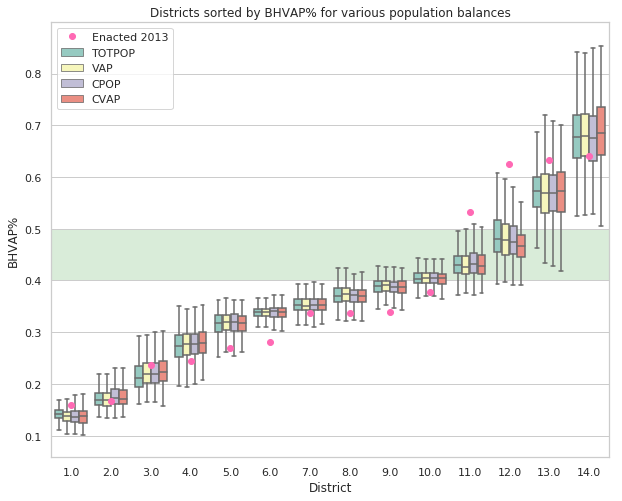

In [18]:
plt.figure(figsize=(10,8))
plt.title("Districts sorted by BHVAP% for various population balances")
plt.xlabel("Sorted Districts")
plt.ylabel("BHVAP%")
sns.set(style="whitegrid")

sns.boxplot(data=collation_cong_results, x="District", y="BHVAP%",
            hue="redistricted_by", 
#             hue_order=["TOTPOP", "CVAP"],
            fliersize=0, palette="Set3")


plt.plot(sorted(cong_df['BHVAP']/cong_df['VAP']),
         marker="o", linestyle="None",
         label="Enacted 2013", color="hotpink", zorder=10)

plt.legend()
plt.axhspan(0.40, 0.50, alpha=0.15, color='green', zorder=0)
plt.show()

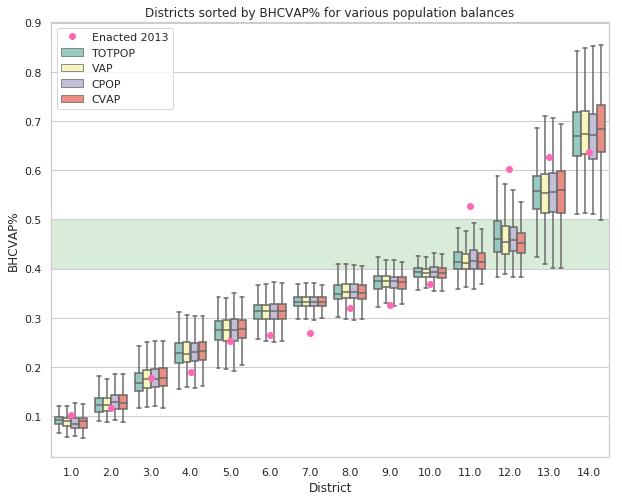

In [19]:
plt.figure(figsize=(10,8))
plt.title("Districts sorted by BHCVAP% for various population balances")
plt.xlabel("Sorted Districts")
plt.ylabel("BHCVAP%")
sns.set(style="whitegrid")

sns.boxplot(data=collation_cong_results, x="District", y="BHCVAP%",
            hue="redistricted_by", 
#             hue_order=["TOTPOP", "CVAP"],
            fliersize=0, palette="Set3")


plt.plot(sorted(cong_df['BHCVAP']/cong_df['CVAP']),
         marker="o", linestyle="None",
         label="Enacted 2013", color="hotpink", zorder=10)

# plt.axvline(x=9.5, color="gray", linestyle="dashed")
plt.legend()
plt.axhspan(0.40, 0.50, alpha=0.15, color='green', zorder=0)
plt.show()

In [20]:
def draw_plot(data, offset, edge_color, fill_color, dists=14):
    pos = np.arange(dists)+1+offset
    #bp = ax.boxplot(data, positions= pos, widths=0.3, patch_artist=True, manage_xticks=False)
    bp = ax.boxplot(data, positions=pos, showfliers=False,
                    patch_artist=True, manage_xticks=False,
                    zorder=4, widths=0.1)
    for element in ['boxes', 'whiskers', 'medians', 'caps']:
        plt.setp(bp[element], color=edge_color,zorder=4)
    for patch in bp['boxes']:
        patch.set(facecolor=fill_color,zorder=0)

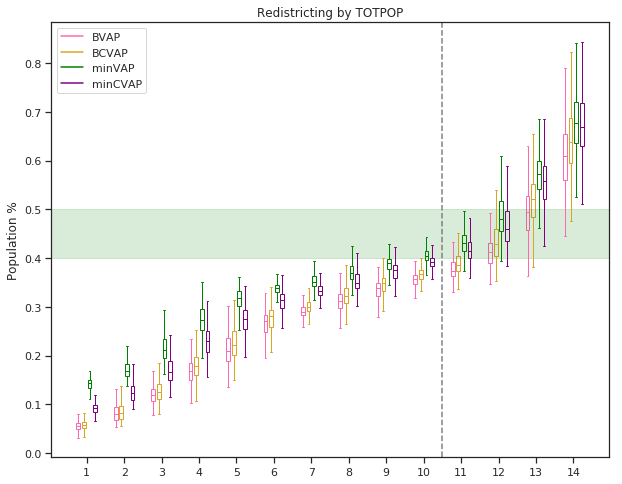

In [67]:
colors = ['hotpink','goldenrod','green','purple']
labels= ['BVAP','BCVAP','minVAP','minCVAP']
sorted_d_nums = [1,2,3,4,5,6,7, 8, 9, 10, 11, 12, 13, 14]

fig, ax = plt.subplots(figsize=(10,8))
draw_plot(TOTPOP_congress["BVAP"],-0.225, colors[0],'w')
draw_plot(TOTPOP_congress["BCVAP"],-.075, colors[1],'w')
draw_plot(TOTPOP_congress["BHVAP"],.075, colors[2],'w')
draw_plot(TOTPOP_congress["BHCVAP"],0.225, colors[3],'w')

plt.axvline(x=10.5, color="gray", linestyle="dashed")
plt.axhspan(0.40, 0.50, alpha=0.15, color='green')
plt.ylabel("Population %")
plt.title("Redistricting by TOTPOP")

plt.xticks(range(1,15))

for i in range(4):
    plt.plot([],[],color=colors[i],label=labels[i])
    
plt.legend()

plt.show()
# plt.savefig("../plots/minority_opportunity_results_GA_congress_collalition_results_TOTPOP")

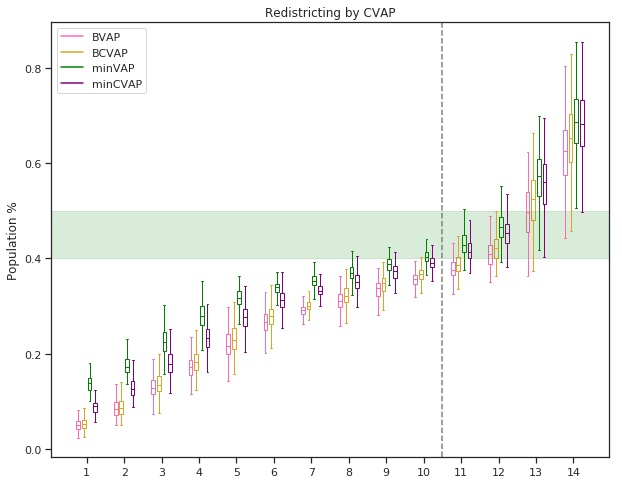

In [22]:
sns.set_style("ticks")

colors = ['hotpink','goldenrod','green','purple']
labels= ['BVAP','BCVAP','minVAP','minCVAP']
sorted_d_nums = [1,2,3,4,5,6,7, 8, 9, 10, 11, 12, 13, 14]

fig, ax = plt.subplots(figsize=(10,8))
draw_plot(CVAP_congress["BVAP"],-0.225, colors[0],'w')
draw_plot(CVAP_congress["BCVAP"],-.075, colors[1],'w')
draw_plot(CVAP_congress["BHVAP"],.075, colors[2],'w')
draw_plot(CVAP_congress["BHCVAP"],0.225, colors[3],'w')

plt.axvline(x=10.5, color="gray", linestyle="dashed")
plt.axhspan(0.40, 0.50, alpha=0.15, color='green')
plt.ylabel("Population %")
plt.title("Redistricting by CVAP")

plt.xticks(range(1,15))

for i in range(4):
    plt.plot([],[],color=colors[i],label=labels[i])
    
plt.legend()

plt.show()
# plt.savefig("../plots/minority_opportunity_results_GA_congress_collalition_results_CVAP")

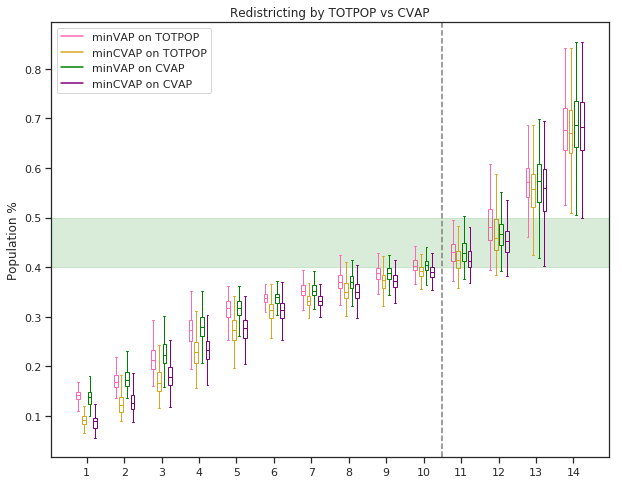

In [23]:
sns.set_style("ticks")

colors = ['hotpink','goldenrod','green','purple']
labels= ['minVAP on TOTPOP','minCVAP on TOTPOP',
         'minVAP on CVAP','minCVAP on CVAP']
sorted_d_nums = [1,2,3,4,5,6,7, 8, 9, 10, 11, 12, 13, 14]

fig, ax = plt.subplots(figsize=(10,8))
draw_plot(TOTPOP_congress["BHVAP"],-0.225, colors[0],'w')
draw_plot(TOTPOP_congress["BHCVAP"],-.075, colors[1],'w')
draw_plot(CVAP_congress["BHVAP"],.075, colors[2],'w')
draw_plot(CVAP_congress["BHCVAP"],0.225, colors[3],'w')

plt.axvline(x=10.5, color="gray", linestyle="dashed")
plt.axhspan(0.40, 0.50, alpha=0.15, color='green')
plt.ylabel("Population %")
plt.title("Redistricting by TOTPOP vs CVAP")

plt.xticks(range(1,15))

for i in range(4):
    plt.plot([],[],color=colors[i],label=labels[i])
    
plt.legend()

plt.show()

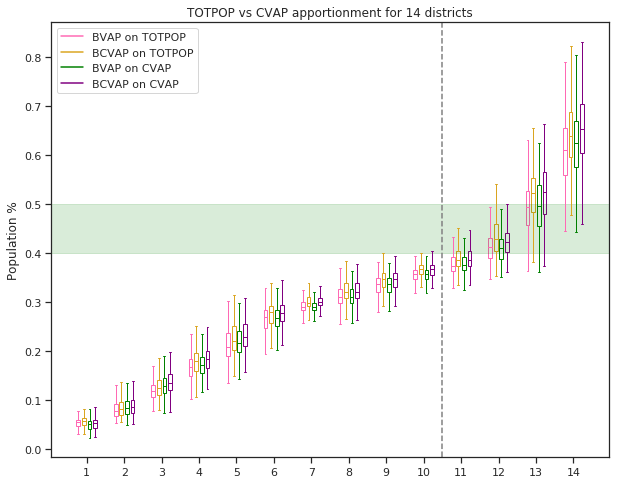

In [24]:
sns.set_style("ticks")

colors = ['hotpink','goldenrod','green','purple']
labels= ['BVAP on TOTPOP','BCVAP on TOTPOP',
         'BVAP on CVAP','BCVAP on CVAP']
sorted_d_nums = [1,2,3,4,5,6,7, 8, 9, 10, 11, 12, 13, 14]

fig, ax = plt.subplots(figsize=(10,8))
draw_plot(TOTPOP_congress["BVAP"],-0.225, colors[0],'w')
draw_plot(TOTPOP_congress["BCVAP"],-.075, colors[1],'w')
draw_plot(CVAP_congress["BVAP"],.075, colors[2],'w')
draw_plot(CVAP_congress["BCVAP"],0.225, colors[3],'w')

plt.axvline(x=10.5, color="gray", linestyle="dashed")
plt.axhspan(0.40, 0.50, alpha=0.15, color='green')
plt.ylabel("Population %")
plt.title("TOTPOP vs CVAP apportionment for 14 districts")

plt.xticks(range(1,15))

for i in range(4):
    plt.plot([],[],color=colors[i],label=labels[i])
    
plt.legend()

plt.show()

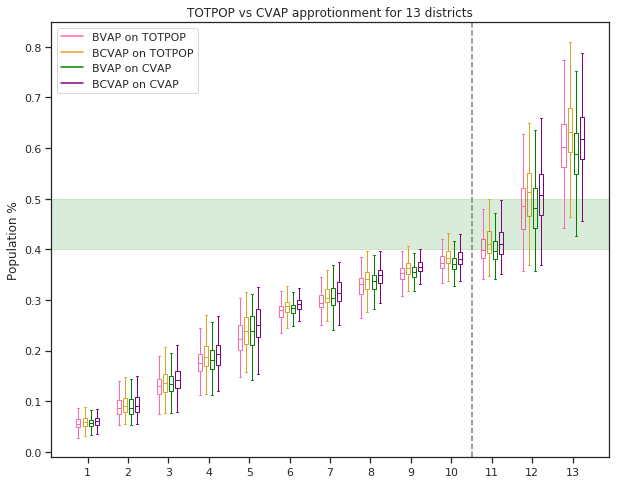

In [25]:
sns.set_style("ticks")

colors = ['hotpink','goldenrod','green','purple']
labels= ['BVAP on TOTPOP','BCVAP on TOTPOP',
         'BVAP on CVAP','BCVAP on CVAP']
sorted_d_nums = [1,2,3,4,5,6,7, 8, 9, 10, 11, 12, 13, 14]

fig, ax = plt.subplots(figsize=(10,8))
draw_plot(TOTPOP_congress_2010["BVAP"],-0.225, colors[0],'w', dists=13)
draw_plot(TOTPOP_congress_2010["BCVAP"],-.075, colors[1],'w', dists=13)
draw_plot(CVAP_congress_2010["BVAP"],.075, colors[2],'w', dists=13)
draw_plot(CVAP_congress_2010["BCVAP"],0.225, colors[3],'w', dists=13)

plt.axvline(x=10.5, color="gray", linestyle="dashed")
plt.axhspan(0.40, 0.50, alpha=0.15, color='green')
plt.ylabel("Population %")
plt.title("TOTPOP vs CVAP approtionment for 13 districts")

plt.xticks(range(1,14))

for i in range(4):
    plt.plot([],[],color=colors[i],label=labels[i])
    
plt.legend()

plt.show()

## Cut Edges and Enacted Plans

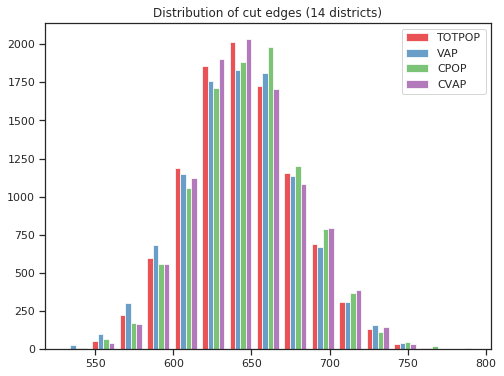

In [66]:
sns.set(style="ticks", palette="Set1")
plt.figure(figsize=(8,6))
plt.title("Distribution of cut edges (14 districts)")
plt.hist([TOTPOP_congress["cutedges"], VAP_congress["cutedges"],
          CPOP_congress["cutedges"], CVAP_congress["cutedges"]], 
          label=["TOTPOP", "VAP", "CPOP", "CVAP"], alpha=0.75, bins=15)
plt.legend()
plt.show()

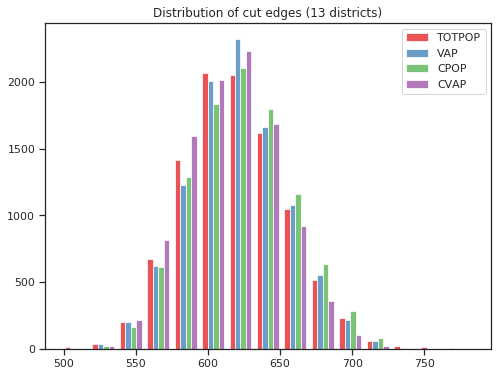

In [65]:
sns.set(style="ticks", palette="Set1")
plt.figure(figsize=(8,6))
plt.title("Distribution of cut edges (13 districts)")
plt.hist([TOTPOP_congress_2010["cutedges"], VAP_congress_2010["cutedges"],
          CPOP_congress_2010["cutedges"], CVAP_congress_2010["cutedges"]], 
          label=["TOTPOP", "VAP", "CPOP", "CVAP"], alpha=0.75, bins=15)
plt.legend()
plt.show()